## Binarization Algorithm

#### This is an image binarization algorithm that uses the Otsu's method to find the optimal threshold value for the binarization of the image.
---

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

The best threshold is:  127
The minimum loss is:  74958861.0


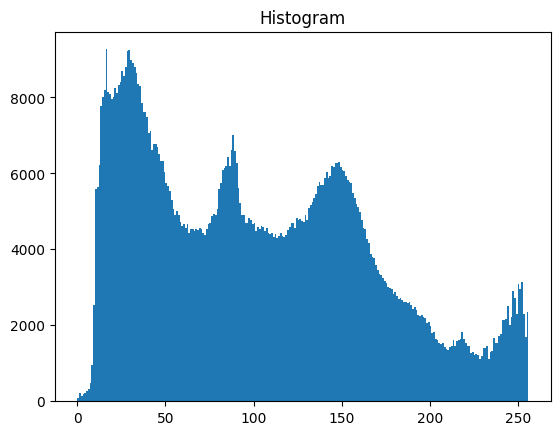

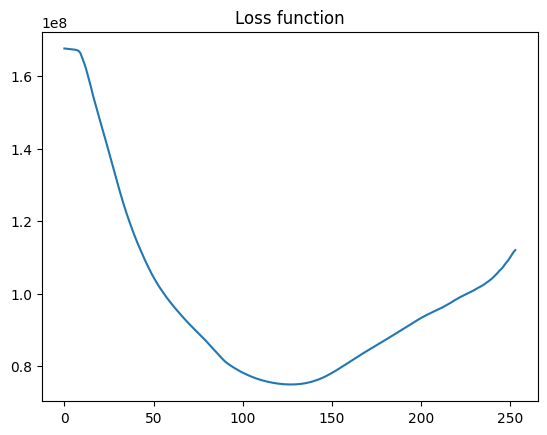

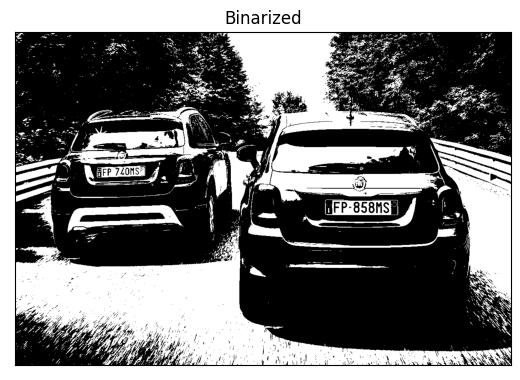

In [35]:
# Load image
img = cv.imread('images/carplates.jpeg')

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Show the histogram
num, bin, _ = plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Histogram')

# Loss function
def get_loss(num, bin, thresh):
     # distance if the pixel is under the threshold
     bin = bin[:-1]
     dist_under_thresh = bin[:thresh]
     norm_dist_under_thresh = dist_under_thresh #/ np.abs((thresh - np.min(dist_under_thresh)))
     
     # distance if the pixel is over the threshold
     dist_over_thresh = 255 - bin[thresh:]
     norm_dist_over_thresh = dist_over_thresh #/ np.abs((np.max(dist_over_thresh) - thresh))
     
     # concatenate the two parts
     dist_mat = np.concatenate((norm_dist_under_thresh, norm_dist_over_thresh))
     loss = np.sum(num * dist_mat) # Loss function
     return loss

def get_best_thresh(num, bin, show_loss = False):
	loss_list = []
	for i in range(1,255):
		loss = get_loss(num, bin, i)
		loss_list.append(loss)
	min_loss = np.min(loss_list)
	best_thresh = np.argmin(loss_list)
	if show_loss:
		plt.figure()
		plt.plot(loss_list)
		plt.title('Loss function')
	return best_thresh, min_loss

def apply_thresh(img_gray, thresh, show_img = False):
	img_bin = img_gray > thresh # Mask
	if show_img:
		plt.figure()
		plt.imshow(img_bin, cmap='gray')
		plt.title('Binarized'), plt.xticks([]), plt.yticks([])
	return img_bin

best_thresh, min_loss = get_best_thresh(num, bin, show_loss=True)
img_bin = apply_thresh(img_gray, best_thresh, show_img = True)

print('The best threshold is: ', best_thresh)
print('The minimum loss is: ', min_loss)
     

(Text(0.5, 1.0, 'Binarized with Otsu'), ([], []), ([], []))

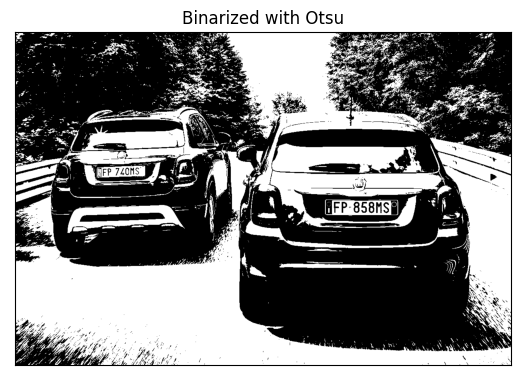

In [36]:
img_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU)[1]
plt.figure()
plt.imshow(img_otsu, cmap='gray')
plt.title('Binarized with Otsu'), plt.xticks([]), plt.yticks([])

In [31]:
thresh = list(np.arange(1,255))
bin_n = bin[:-1]
loss_list = []

for t in thresh:
	# distance if the pixel is under the threshold
	dist_under_thresh = bin_n[:t]
	norm_dist_under_thresh = dist_under_thresh #/ np.abs((t - np.min(dist_under_thresh)))

	# distance if the pixel is over the threshold
	dist_over_thresh = 255 - bin_n[t:]
	norm_dist_over_thresh = dist_over_thresh #/ np.abs((np.max(dist_over_thresh) - t))

	# concatenate the two parts
	dist_mat = np.concatenate((norm_dist_under_thresh, norm_dist_over_thresh))
	loss = np.sum(num * dist_mat) # Loss function
 
	loss_list.append(loss)

min_loss = np.min(loss_list)
min_loss_idx = np.argmin(loss_list)
print('The best threshold is: ', thresh[min_loss_idx])
print('The minimum loss is: ', min_loss)

The best threshold is:  128
The minimum loss is:  51270641.0


In [32]:
dist_over_thresh

array([1., 0.])